In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
from ifis_tools import asynch_manager as am
from ifis_tools import database_tools as db
from ifis_tools import series_tools as ser
from climata.usgs import InstantValueIO, DailyValueIO
import hydroeval
import glob
import pylab as pl
import datetime as dt 

In [ ]:
LinkData['05421000']

In [ ]:
datelist = pd.date_range(end=pd.datetime.today(), periods=ndays).tolist()

In [39]:
def WEB_Get_USGS(usgs_code, date1, date2):
    '''Get USGS data from the web using the climdata interface
    Parameters (debe ser probado):
        - usgs_code: the code of the station to obtain.
        - date1: initial date.
        - date2: final date.'''
    #Modify dates
    date1 = str(aux.__datetime2unix__(date1))
    date2 = str(aux.__datetime2unix__(date2))
    #Get the data form the web 
    data = InstantValueIO(
        start_date = pd.Timestamp('2015-01-01'),
        end_date = pd.Timestamp('2015-12-31'),
        station = "05421000",
        parameter = "00060")
    #Convert the data into a pandas series 
    for series in data:
        flow = [r[1] for r in series.data]
        dates = [r[0] for r in series.data]
    return pd.Series(flow, dates)
    


In [47]:
QmaxA = np.median(Qo.resample('A').max())
peaks = ser.Events_Get_Peaks(Qo)
ends, peaks = ser.Events_Get_End(Qo, peaks, minDif=1)

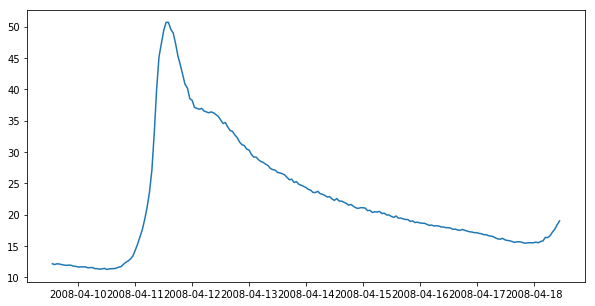

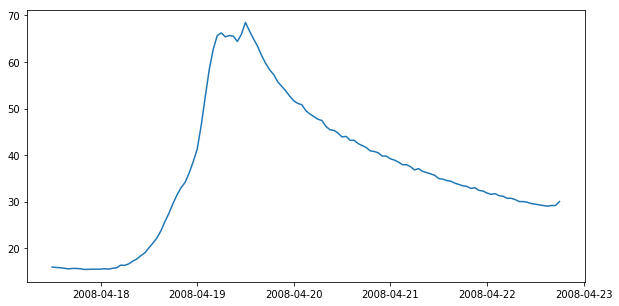

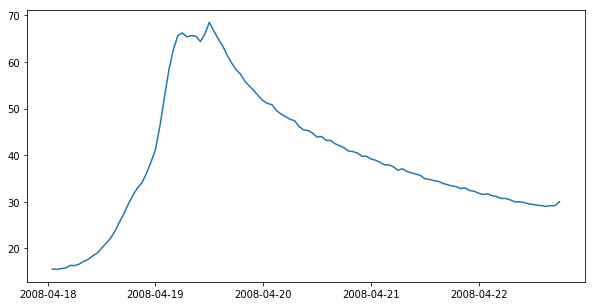

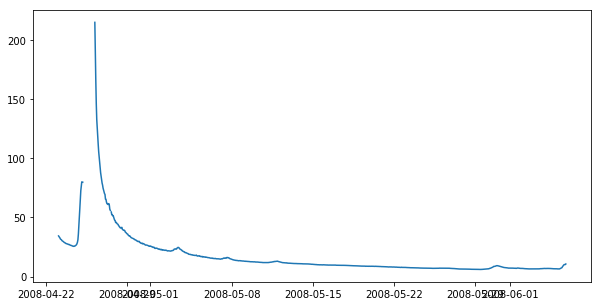

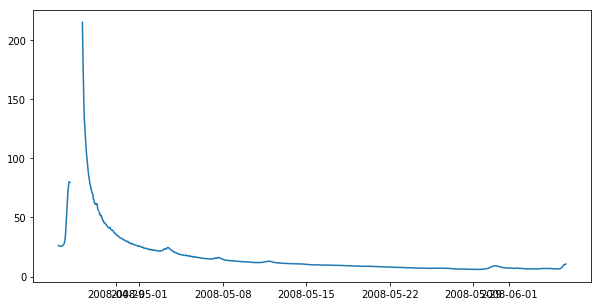

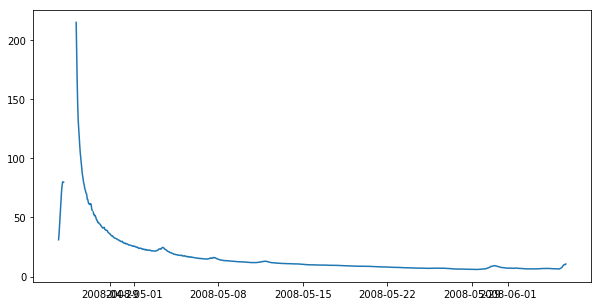

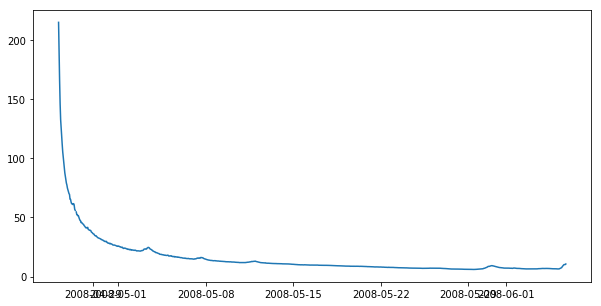

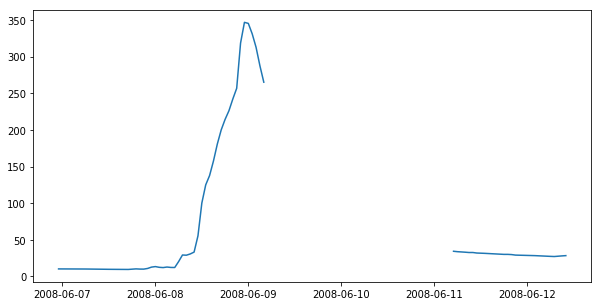

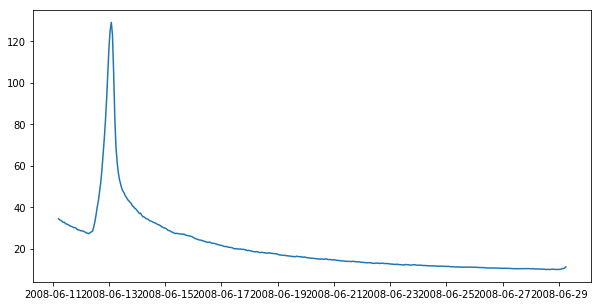

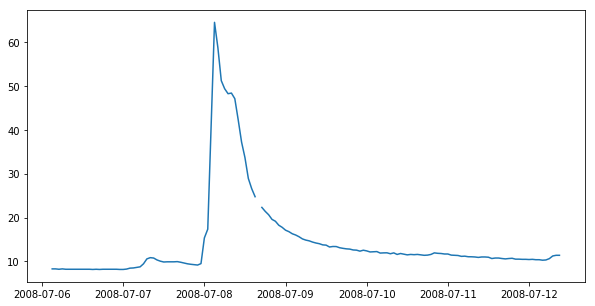

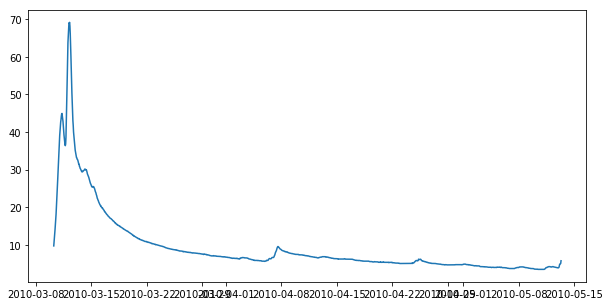

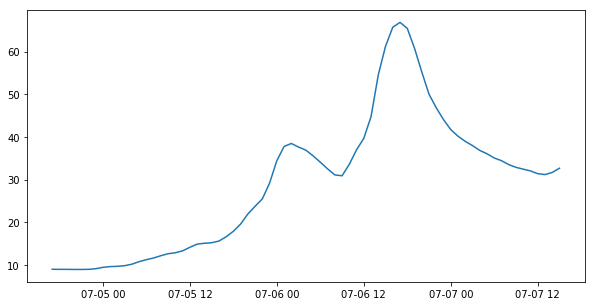

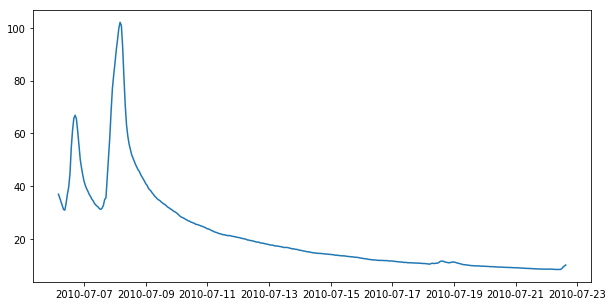

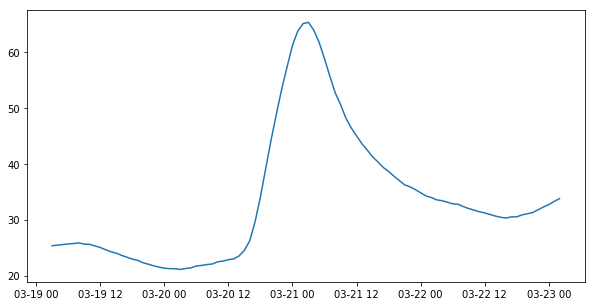

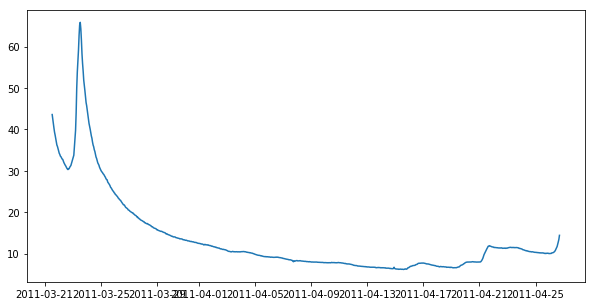

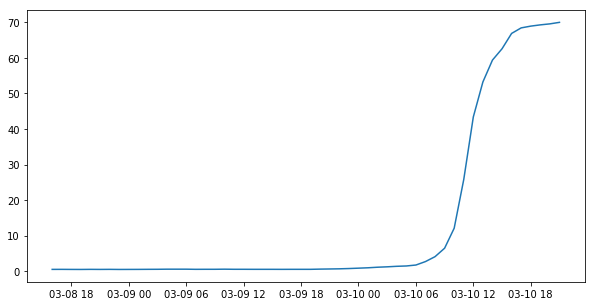

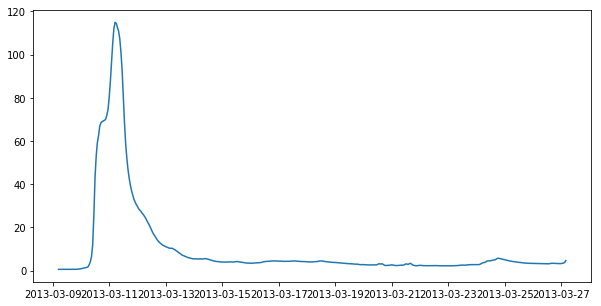

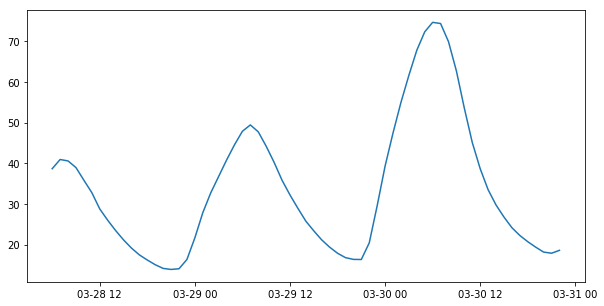

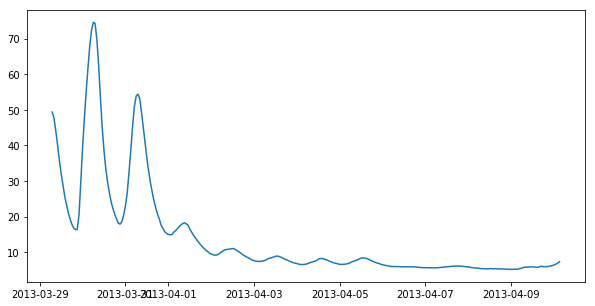

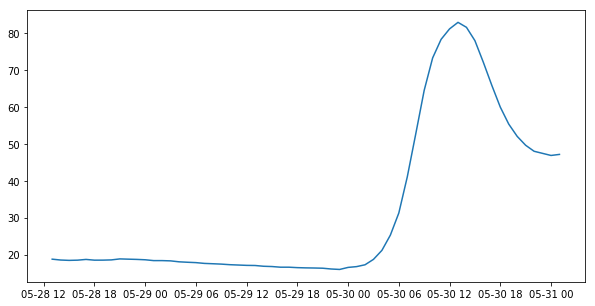

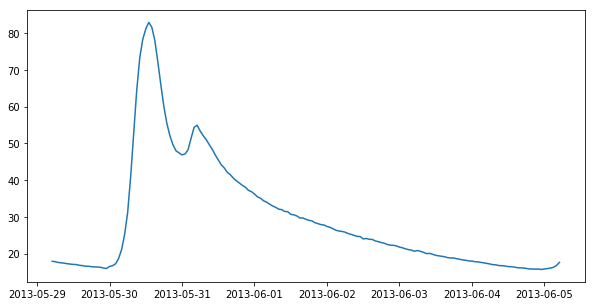

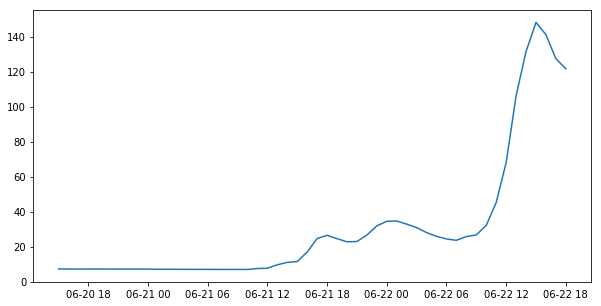

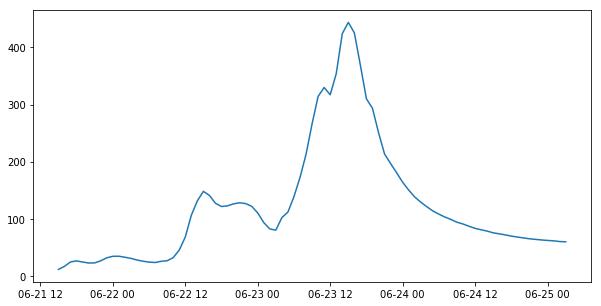

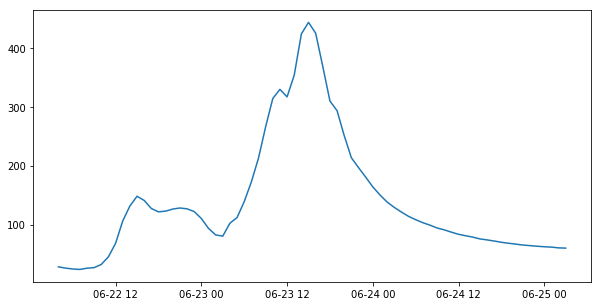

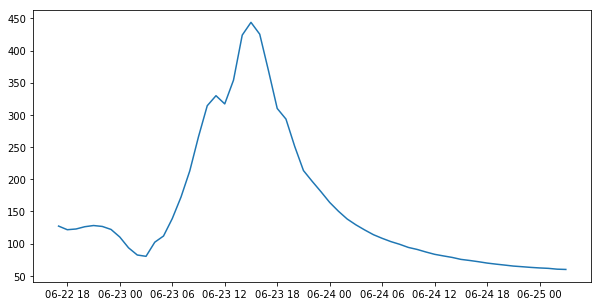

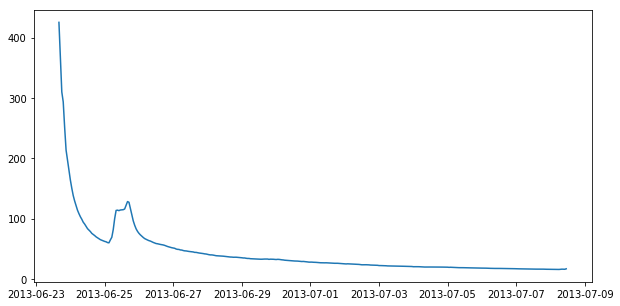

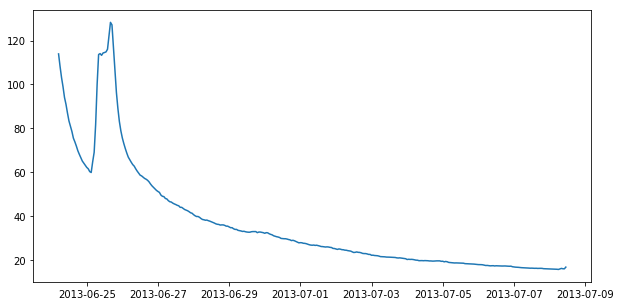

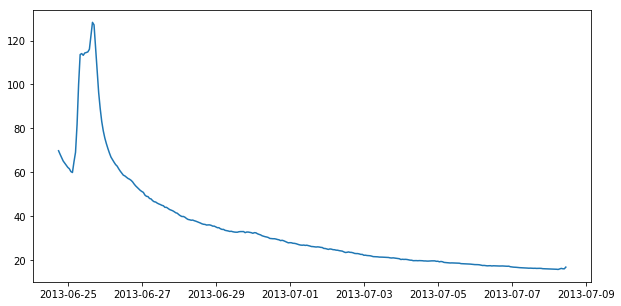

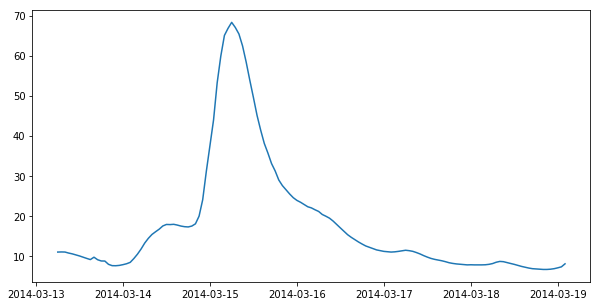

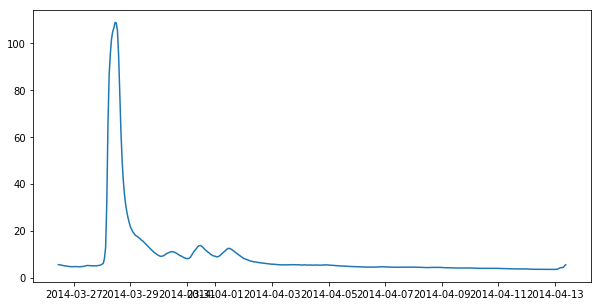

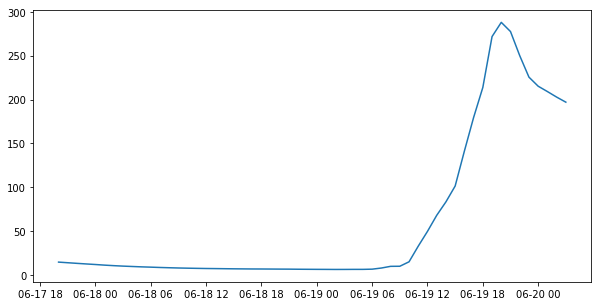

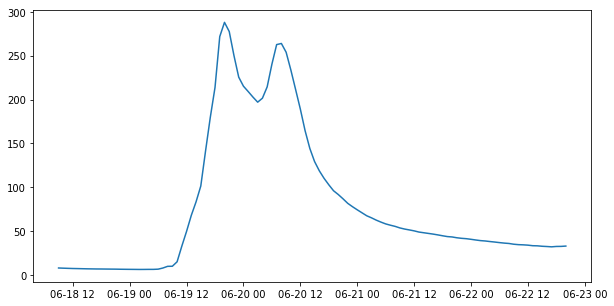

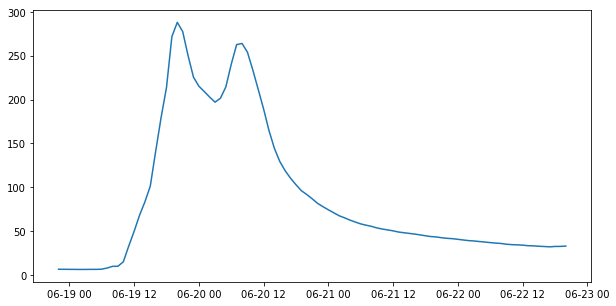

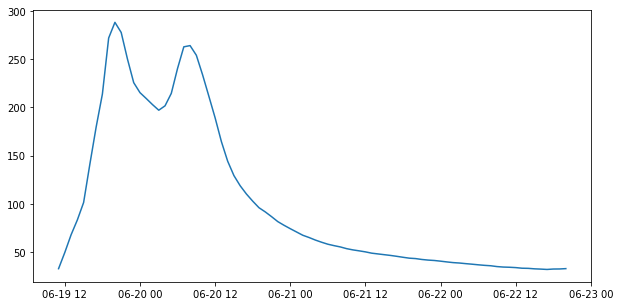

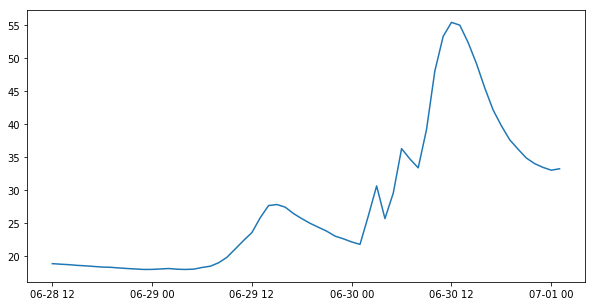

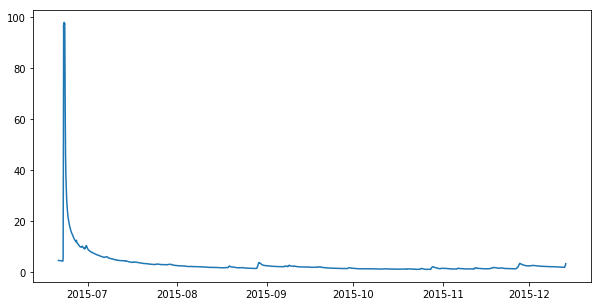

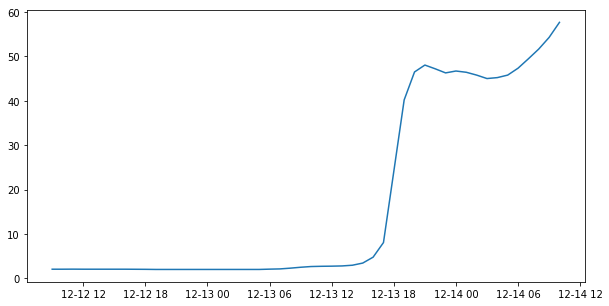

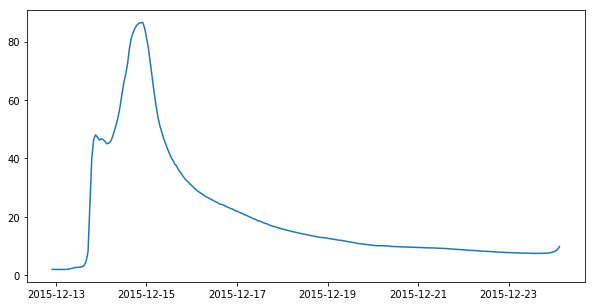

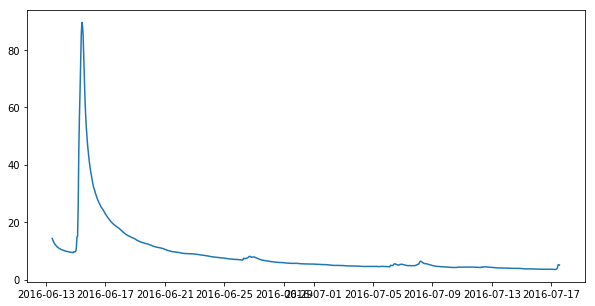

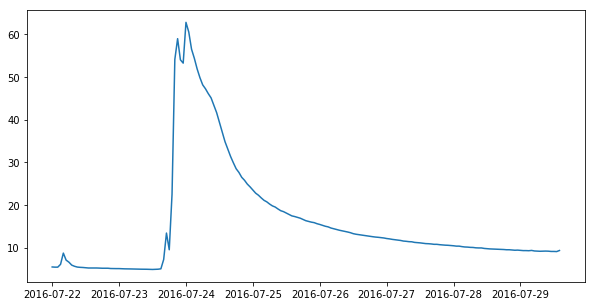

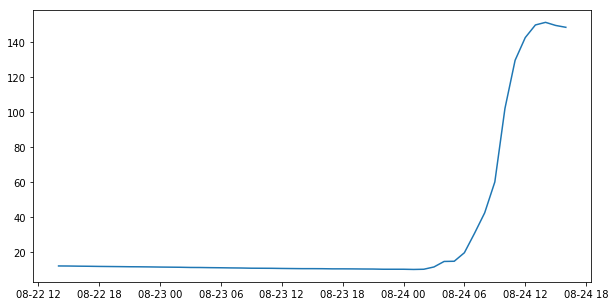

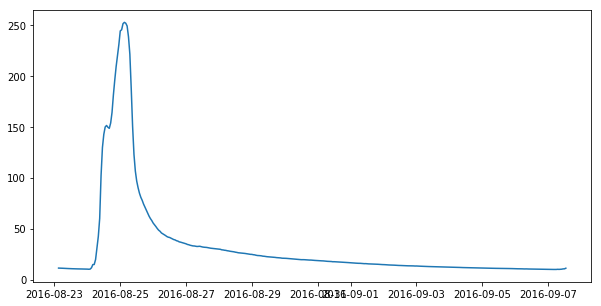

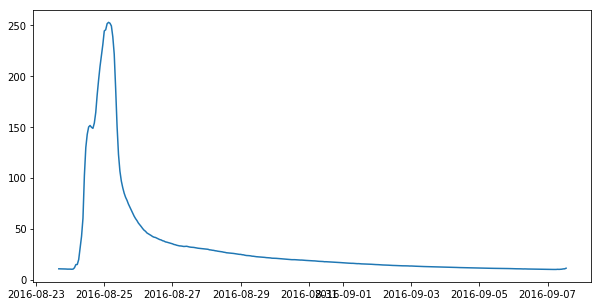

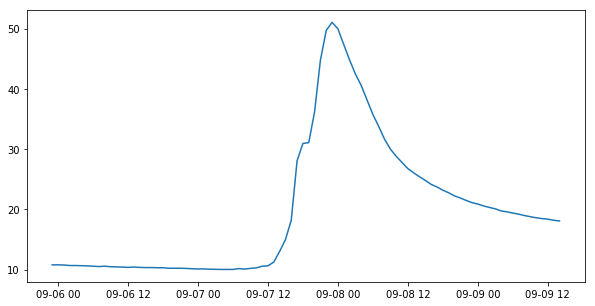

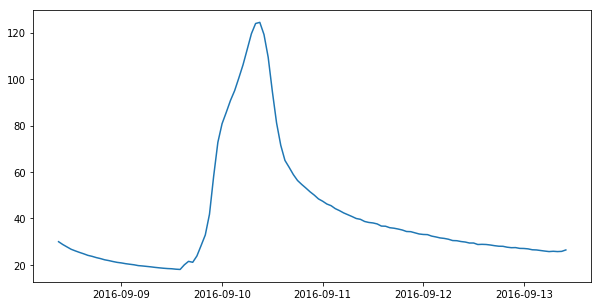

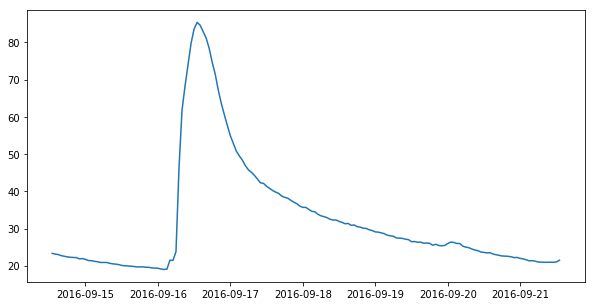

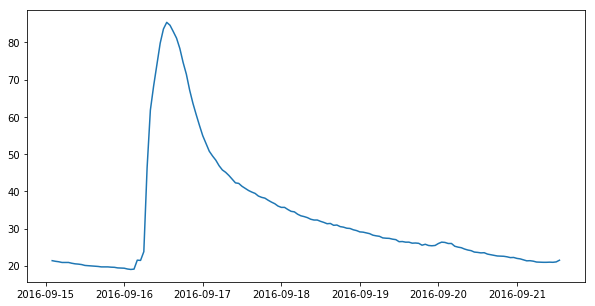

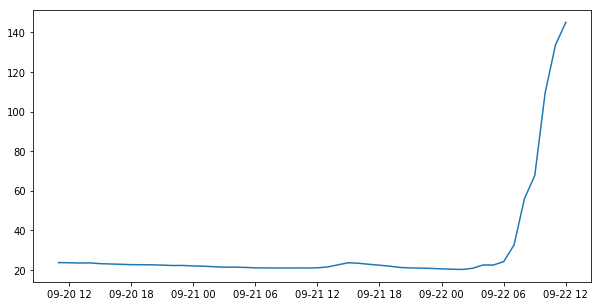

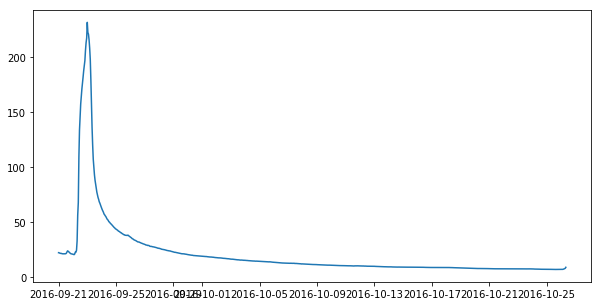

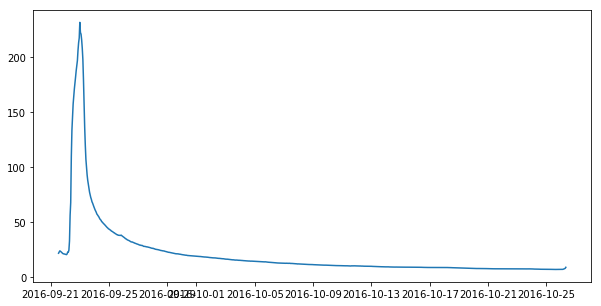

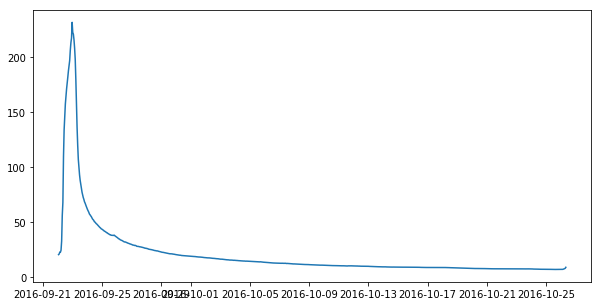

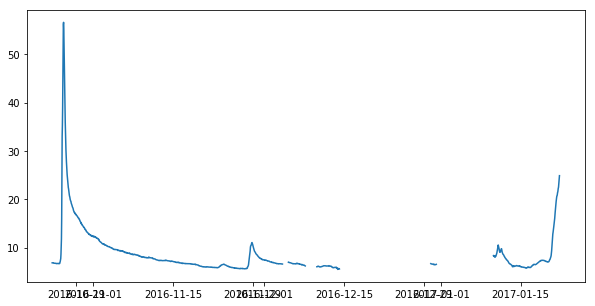

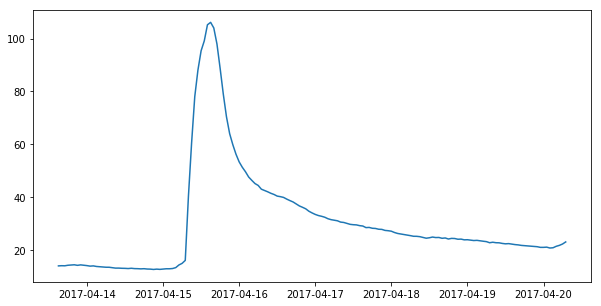

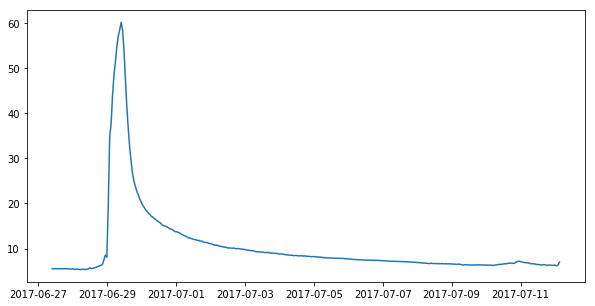

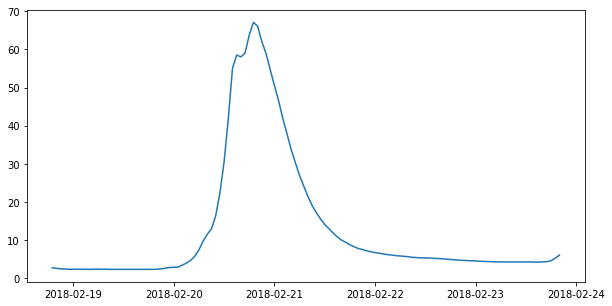

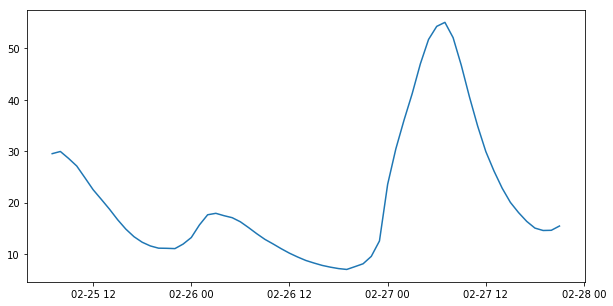

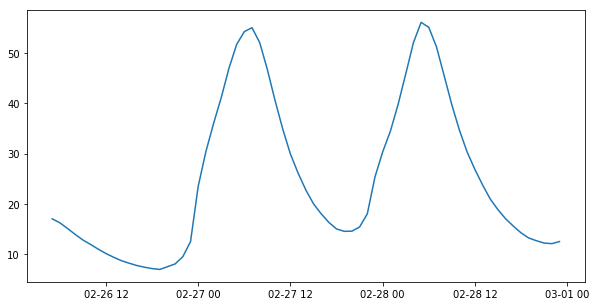

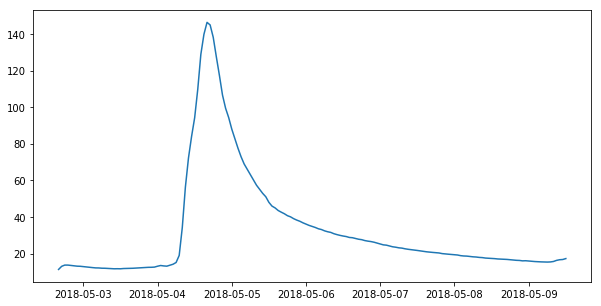

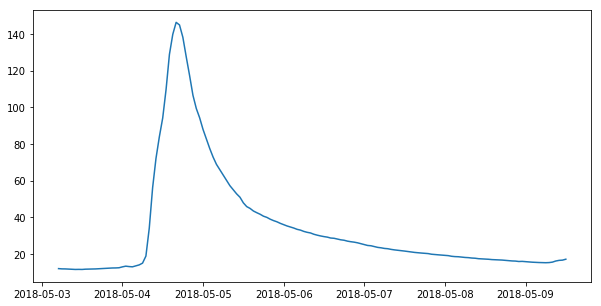

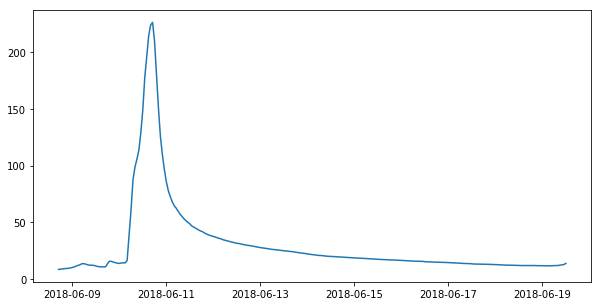

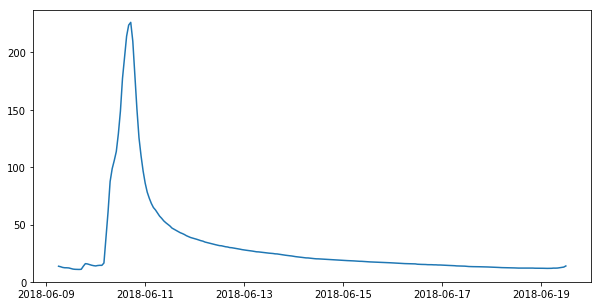

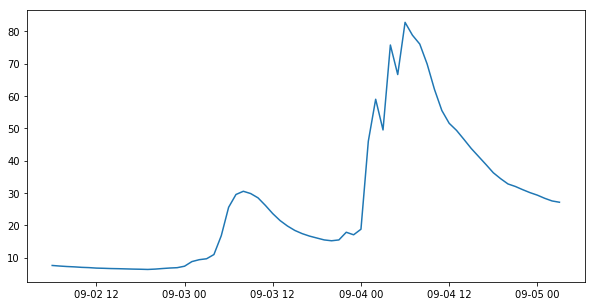

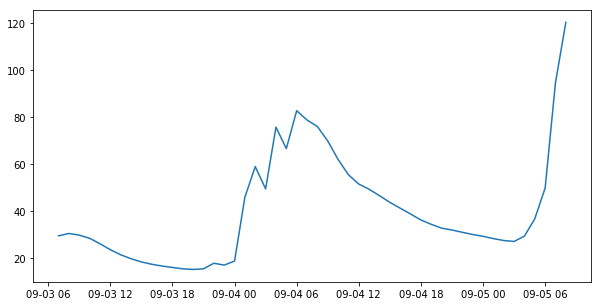

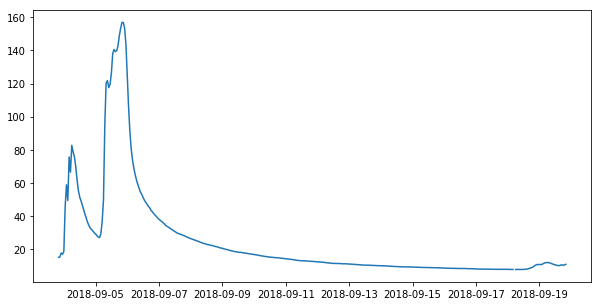

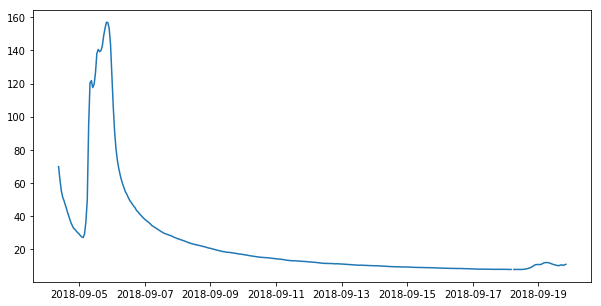

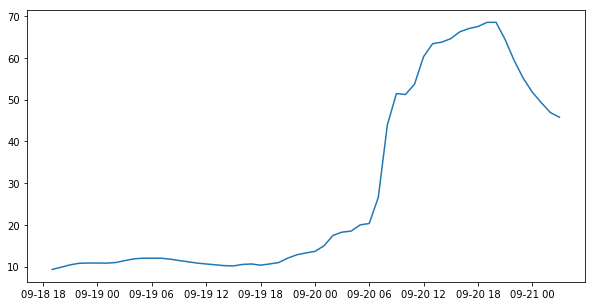

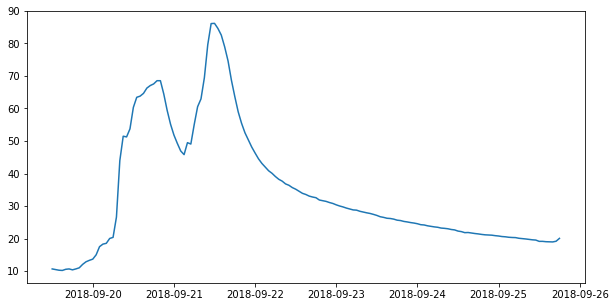

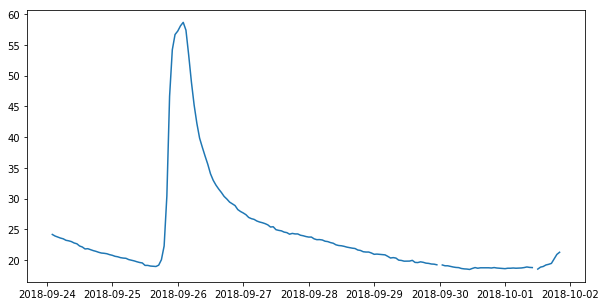

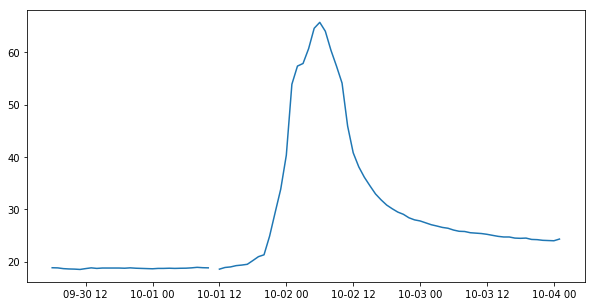

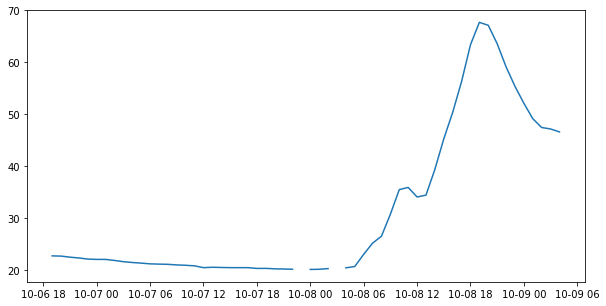

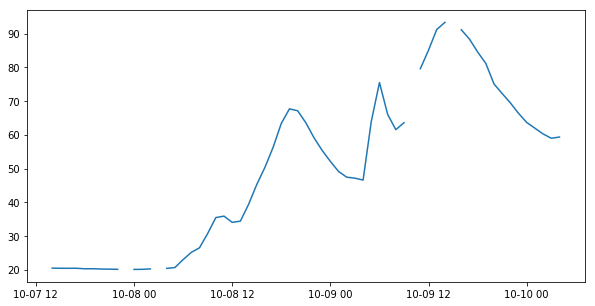

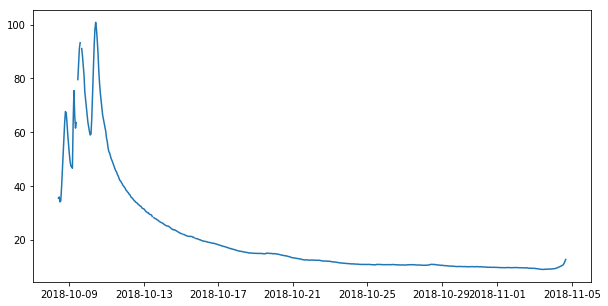

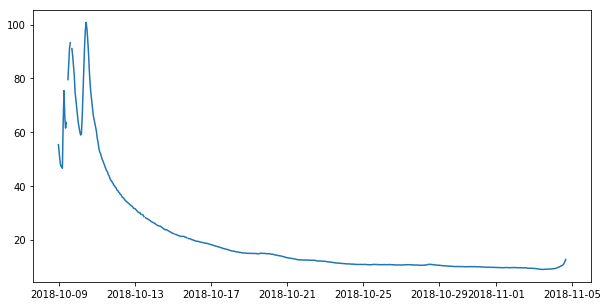

In [48]:
for i,j in zip(peaks.index, ends.index):
    fig = pl.figure(figsize=(10,5))
    pl.plot(Qo[i-pd.Timedelta('2day'):j])
    #Qo[peaks.index[2]-pd.Timedelta('2day'):ends.index[2]].plot()

In [65]:
umbral = 0.5
Qo = pd.read_msgpack('BaseData/USGS/292251.msg')
Qo = Qo.resample('H').mean()
Qs = pd.read_msgpack('BaseData/HLM190/292251.msg')
Qs = Qs.resample('H').mean()
shared = Qo.index.intersection(Qs.index)
Qs = Qs[shared]
Qo = Qo[shared]
p1,p2 = ser.Runoff_FindEvents(Qo,Qs,umbral)

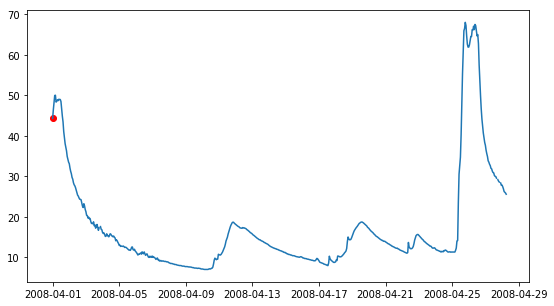

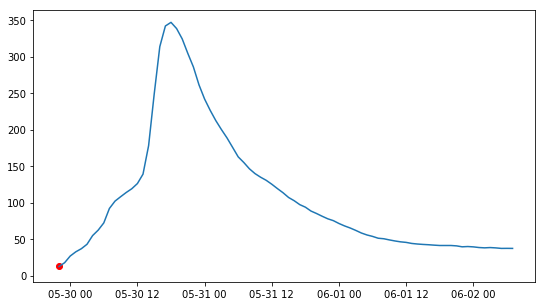

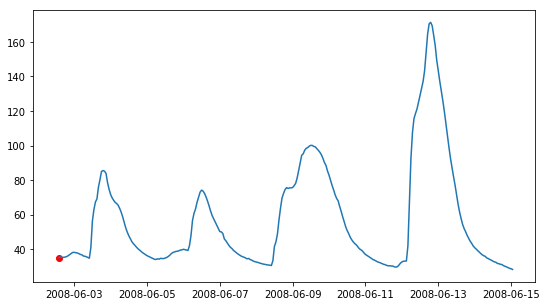

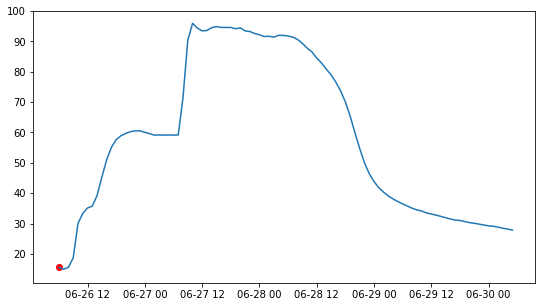

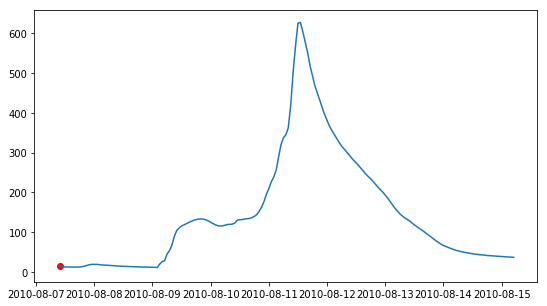

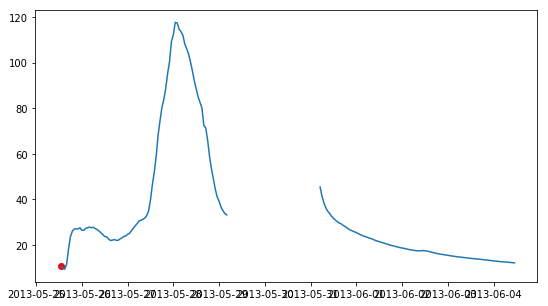

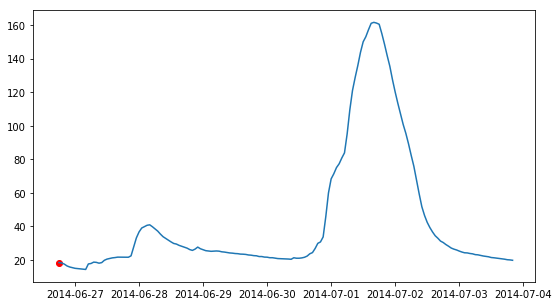

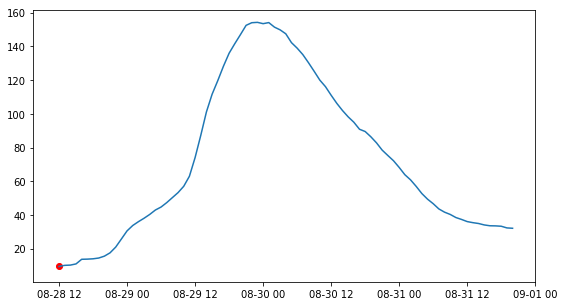

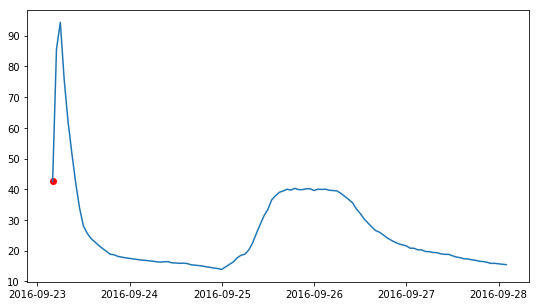

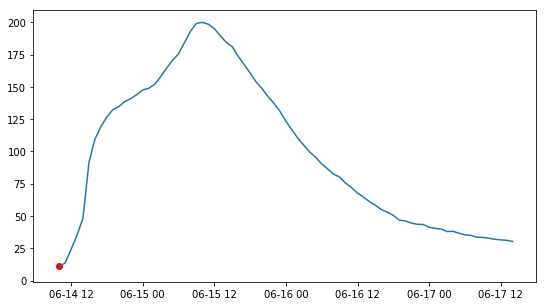

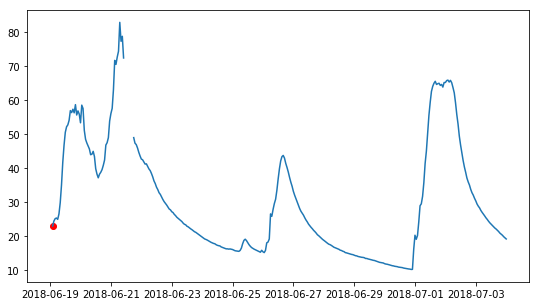

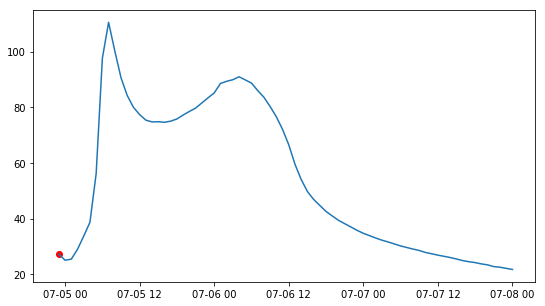

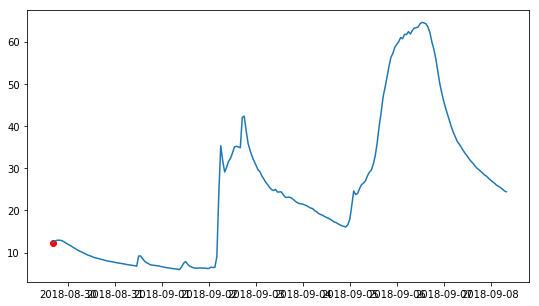

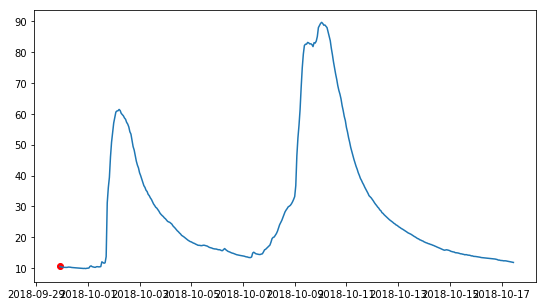

In [66]:

#max anual flood 
QmaxA = np.median(Qo.resample('A').max())
#Base streamflow level
Qbase = Qo.resample('A').apply(lambda x: np.percentile(x[np.isfinite(x)],50)).mean()

#Final search of good events
Buenos = []
for i,j in zip(p1,p2):
    #j = j+pd.Timedelta('10h')
    M = Qo[i:j].max()
    if M > QmaxA*umbral:
        #Check amount of nans.        
        NaNPercent = Qo[i:j][np.isnan(Qo[i:j])].size / Qo[i:j].size
        if NaNPercent < 0.2:
            #Check the time between peak and strt of the event
            Td = Qo[i:j].idxmax() - i
            while Qo[i]<Qbase*2.5:
                i = i + pd.Timedelta('5h')     
            fig = pl.figure(figsize=(9,5))
            pl.plot(Qo[i:j])
            pl.scatter(i, Qo[i],c='r', )        
            Buenos.append(i)

In [67]:
len(Buenos )

14

In [3]:
%%time
usgs = db.SQL_USGS_at_IFIS()
LinkData = {}
for k in usgs.keys():
    Area = db.SQL_Get_linkArea(usgs[k])
    LatLon = db.SQL_Get_Coordinates(usgs[k])
    LinkData.update({k:{'Area':Area, 'Coord': LatLon, 'Link': usgs[k]}})

CPU times: user 138 ms, sys: 89.3 ms, total: 228 ms
Wall time: 3.14 s


In [7]:
D = pd.DataFrame.from_dict(LinkData).T

In [8]:
D.to_msgpack('LinkData.msg')

In [4]:
%%time
D = pd.read_msgpack('LinkData.msg')

CPU times: user 2.32 ms, sys: 111 µs, total: 2.43 ms
Wall time: 1.96 ms


In [27]:
Area = D['Area'][D['Link'] == 504030].values[0]
USGS = D.index[D['Link'] ==504030].values[0]

In [13]:
Area = D['Area'][Ind]

In [18]:
D.columns

Index(['Area', 'Coord', 'Link'], dtype='object')

In [ ]:
D

In [ ]:
W = pd.ExcelWriter('LinkData.msg')
D.to_excel(W)
W.close()

In [45]:
LinkData['05454300']

{'Area': 253.13400000000001, 'Coord': (41.676682, -91.598781), 'Link': 226574}

In [ ]:
for k in LinkData.keys():
    A = LinkData[k]['Area']
    if A<1000:
        print(k ,LinkData[k])

In [152]:
for k in usgs.keys():
    if usgs[k] == 226574:
        print(k)

05454300


In [175]:
Qo = pd.read_msgpack('BaseData/USGS/483619.msg')

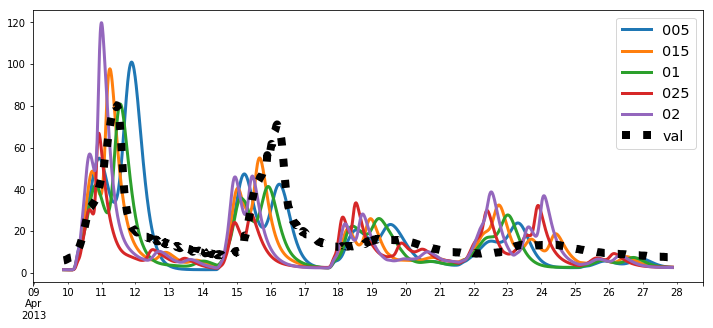

In [177]:
L = glob.glob('Results/483619*201304*csv')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #s.index = Qs.index+pd.Timedelta('12h')
    try:
        Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
    except:
        pass
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

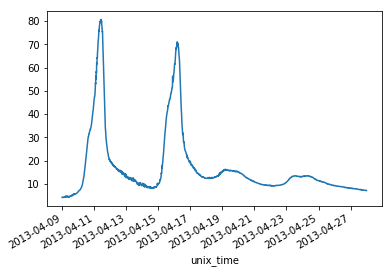

In [166]:
Qo['2013-04-09':'2013-04-27'].plot()

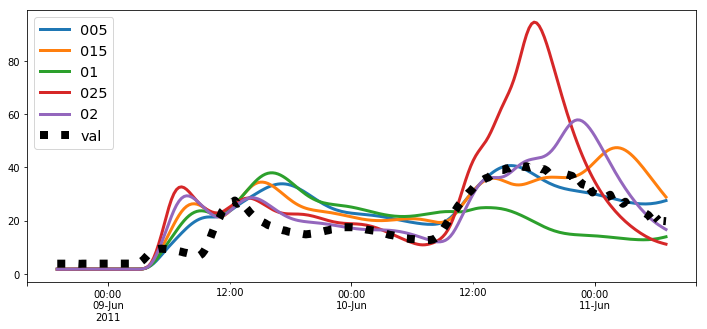

In [25]:
L = glob.glob('Results/226574*201106*csv')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #s.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

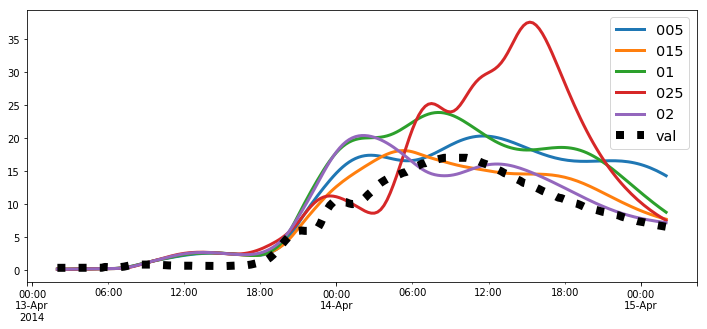

In [24]:
L = glob.glob('Results/226574*201404*.csv')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

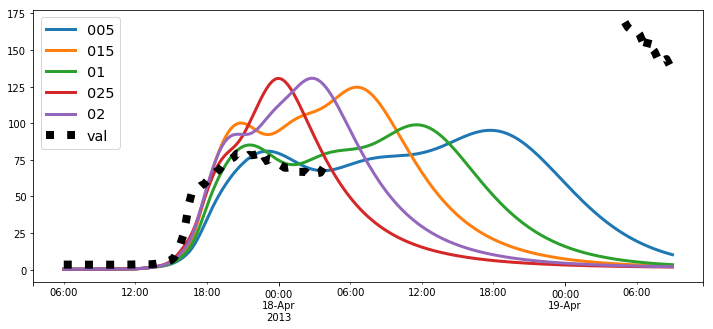

In [23]:
L = glob.glob('Results/226574*20130417*')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

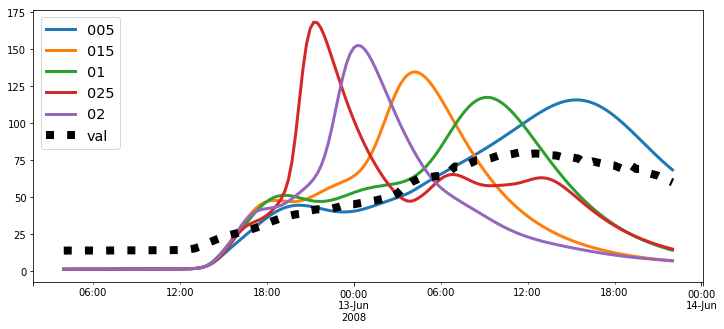

In [20]:
L = glob.glob('Results/*200806*')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

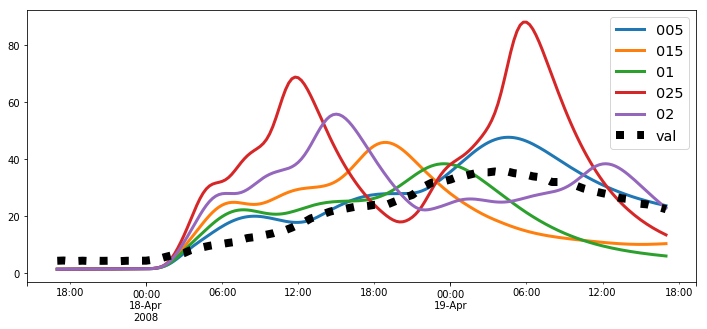

In [21]:
L = glob.glob('Results/*200804*')
L.sort()
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

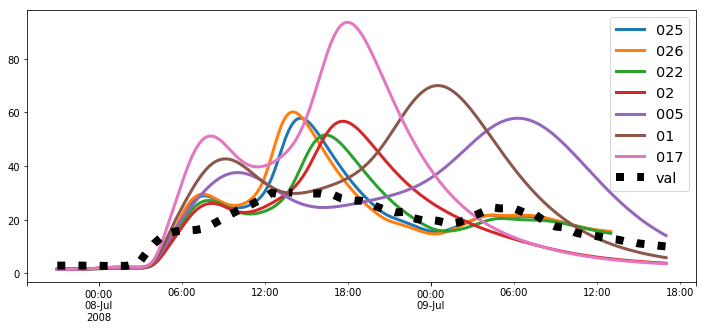

In [699]:
L = glob.glob('226574*200807*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

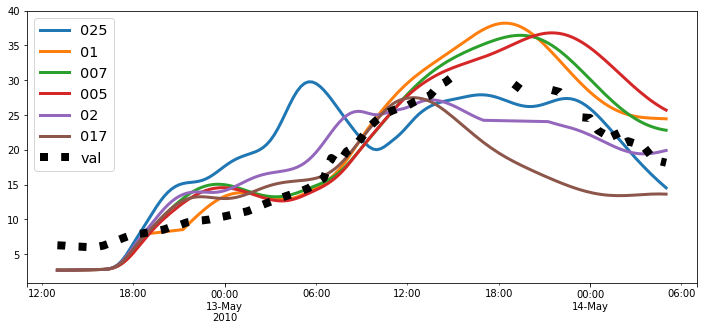

In [694]:
L = glob.glob('226574*201005*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

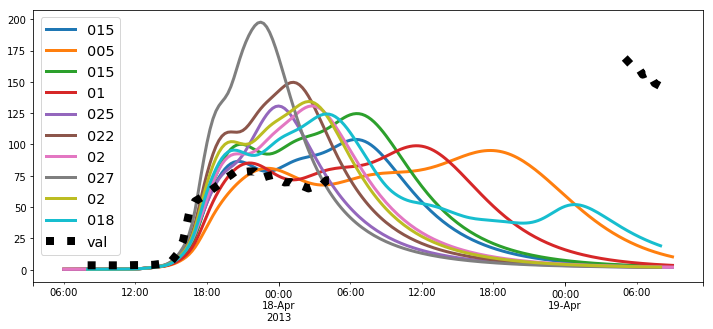

In [79]:
L = glob.glob('Results/226574*20130417*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

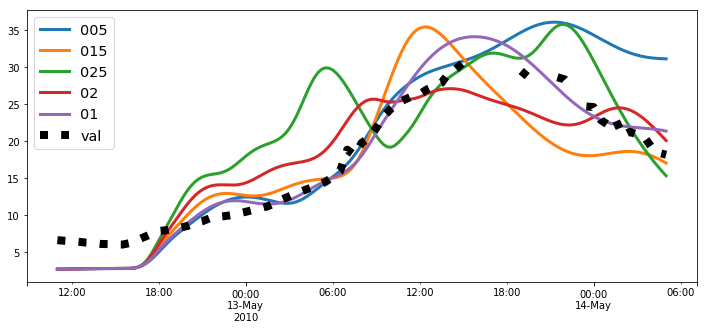

In [85]:
L = glob.glob('Results/226574*201005*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
#Qo[Qs.index].plot.line(lw=8, c='k', ls = ':')
Qo[Qs.resample('30min').mean().index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

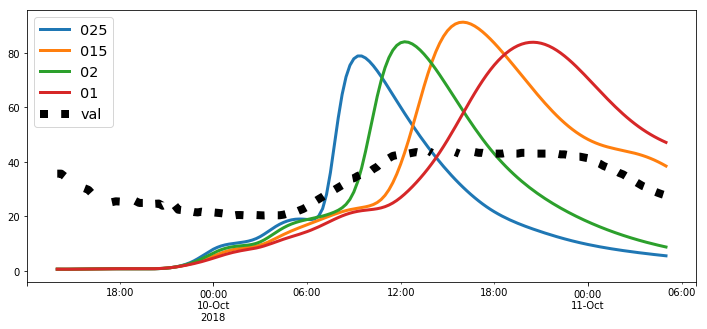

In [44]:
L = glob.glob('226574*20181009*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['Qsim'].plot.line(label=l.split('_')[1], lw = 3)
Qo[Qs.index].plot.line(lw=8, c='k', ls = ':')
pl.legend(loc = 0, fontsize = 'x-large')

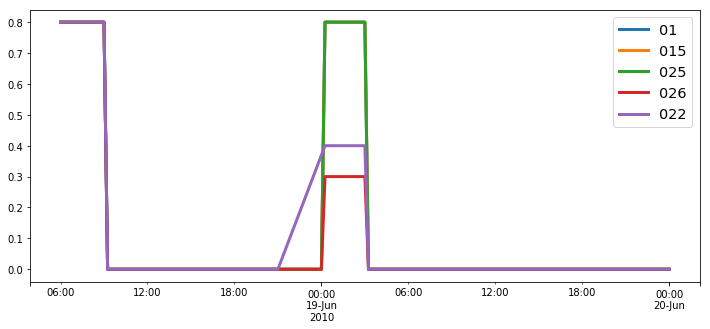

In [705]:
L = glob.glob('226574_*_201006*.csv')
fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for l in L:
    Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
    #Qs.index = Qs.index+pd.Timedelta('12h')
    Qs['RC'].plot.line(label=l.split('_')[1], lw = 3)
pl.legend(loc = 0, fontsize = 'x-large')

# Lambda Variability Analysis.

In [6]:
Qo = pd.read_msgpack('BaseData/USGS/226574.msg')

In [3]:
ListRes = glob.glob('Results/*')
ListRes.sort()

In [4]:
#Function to convert
def String2Date(l):
    return pd.Timestamp(dt.datetime.strptime(l.split('_')[-1].split('.')[0], '%Y%m%d%H%M'))
#Fechas
Tstamps = np.unique(np.array(list(map(String2Date, ListRes))))
#Function to convert again to text
def Date2Str(l):
    return l.to_pydatetime().strftime('%Y%m%d%H%M')
#String dates
Events = list(map(Date2Str, Tstamps))

In [57]:
BestLambdaQ = []
BestLambdaT = []

for E in Events:
    #Reads the data for that period
    L = glob.glob('Results/*'+E+'*')
    Qsim = []
    Keys = []
    for l in L:
        Qs = pd.read_csv(l, index_col = 0, skiprows=0, parse_dates=True)
        Qs = Qs.resample('30min').mean()
        Qsim.append(Qs['Qsim'])
        Keys.append(l.split('_')[1])
    Qsim = pd.concat(Qsim, axis=1, keys=Keys)    
    #Read the observations
    Qobs = Qo[Qs.index]
    #Finds the best lambda in function of the Qpeak
    QpeakD = Qsim.max() - Qobs.max()
    MinLambdaQ = QpeakD.abs().idxmin()
    MinDifQ = QpeakD.abs().min()
    #Finds the best lambda in function of the smallest timming.
    TpeakD = Qobs.idxmax() - Qsim.idxmax()
    TotalSec = []
    Lambdas = []
    for k in TpeakD.keys():
        TotalSec.append(TpeakD[k].seconds/3600.)
        Lambdas.append(k)
    TotalSec = np.array(TotalSec)
    MinLambdaT = Lambdas[TotalSec.argmin()]
    MinDifT = TotalSec.min()
    #Appends Lambdas
    BestLambdaQ.append(MinLambdaQ)
    BestLambdaT.append(MinLambdaT)

(array([2., 4., 0., 2., 0., 3., 1., 0., 5., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

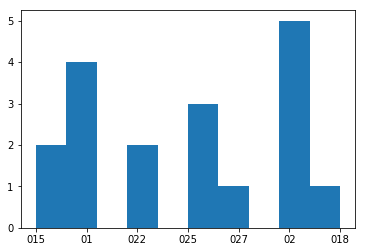

In [59]:

pl.hist(BestLambdaQ)

(array([7., 1., 1., 0., 1., 1., 0., 3., 1., 3.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

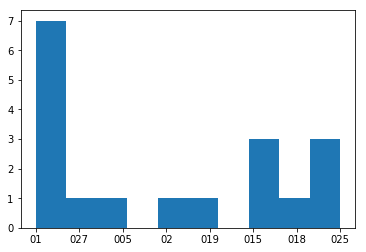

In [60]:
pl.hist(BestLambdaT)

In [65]:
np.floor(56/7)

8.0